In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os
import requests
import base64
from PIL import Image
from IPython.display import display

<IPython.core.display.Javascript object>

In [3]:
api_host = os.getenv("API_HOST", "https://api.stability.ai")
api_key = os.environ.get("STABILITY_API_KEY")

<IPython.core.display.Javascript object>

In [6]:
url = f"{api_host}/v1beta/user/account"
url = f"{api_host}/v1beta/user/balance"
url = f"{api_host}/v1beta/engines/list"

response = requests.get(url, headers={"Authorization": f"Bearer {api_key}"})

if response.status_code != 200:
    raise Exception("Non-200 response: " + str(response.text))

payload = response.json()
print(payload)

[{'description': 'Real-ESRGAN_x2plus upscaler model', 'id': 'esrgan-v1-x2plus', 'name': 'Real-ESRGAN x2', 'type': 'PICTURE'}, {'description': 'Stability-AI Stable Diffusion v1.4', 'id': 'stable-diffusion-v1', 'name': 'Stable Diffusion v1.4', 'type': 'PICTURE'}, {'description': 'Stability-AI Stable Diffusion v1.5', 'id': 'stable-diffusion-v1-5', 'name': 'Stable Diffusion v1.5', 'type': 'PICTURE'}, {'description': 'Stability-AI Stable Diffusion v2.0', 'id': 'stable-diffusion-512-v2-0', 'name': 'Stable Diffusion v2.0', 'type': 'PICTURE'}, {'description': 'Stability-AI Stable Diffusion 768 v2.0', 'id': 'stable-diffusion-768-v2-0', 'name': 'Stable Diffusion v2.0-768', 'type': 'PICTURE'}, {'description': 'Stability-AI Stable Diffusion v2.1', 'id': 'stable-diffusion-512-v2-1', 'name': 'Stable Diffusion v2.1', 'type': 'PICTURE'}, {'description': 'Stability-AI Stable Diffusion 768 v2.1', 'id': 'stable-diffusion-768-v2-1', 'name': 'Stable Diffusion v2.1-768', 'type': 'PICTURE'}, {'description': 

<IPython.core.display.Javascript object>

In [5]:
engine_id = "stable-diffusion-512-v2-0"

<IPython.core.display.Javascript object>

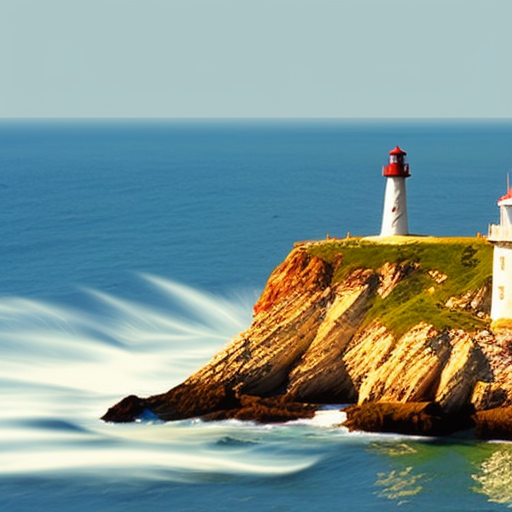

<IPython.core.display.Javascript object>

In [6]:
url = f"{api_host}/v1beta/generation/{engine_id}/text-to-image"

headers = {
    "Content-Type": "application/json",
    "Accept": "application/json",
    "Authorization": f"Bearer {api_key}",
}

payload = {
    "text_prompts": [{"text": "A lighthouse on a cliff", "weight": 1}],
    "cfg_scale": 7,
    "clip_guidance_preset": "FAST_BLUE",
    "height": 512,
    "width": 512,
    "samples": 1,
    "steps": 30,
}

response = requests.post(url=url, headers=headers, json=payload)

if response.status_code != 200:
    raise Exception("Non-200 response: " + str(response.text))

data = response.json()

for i, image in enumerate(data["artifacts"]):
    with open(f"images/v1beta_txt2img_{i}.png", "wb") as f:
        f.write(base64.b64decode(image["base64"]))

img = Image.open("images/v1beta_txt2img_0.png")
display(img)

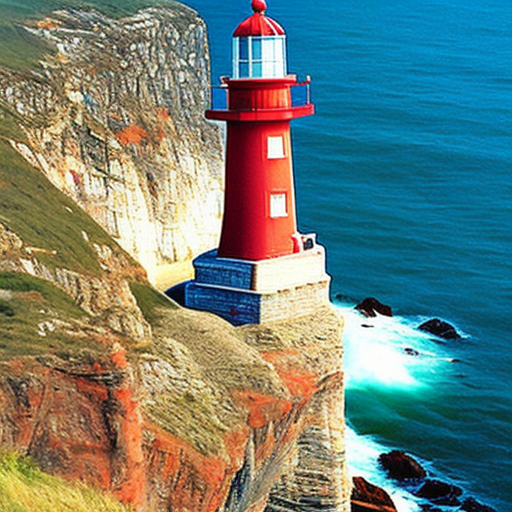

<IPython.core.display.Javascript object>

In [7]:
url = f"{api_host}/v1alpha/generation/{engine_id}/text-to-image"

headers={
    "Content-Type": "application/json",
    "Accept": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload={
    "text_prompts": [
        {
            "text": "A lighthouse on a cliff",
            "weight": 1
        }
    ],
    "cfg_scale": 7,
    "clip_guidance_preset": "FAST_BLUE",
    "height": 512,
    "width": 512,
    "samples": 1,
    "steps": 30,
}

response = requests.post(
    url=url,
    headers=headers,
    json=payload
)

if response.status_code != 200:
    raise Exception("Non-200 response: " + str(response.text))

data = response.json()

for i, image in enumerate(data["artifacts"]):
    with open(f"images/v1beta_txt2img_{i}.png", "wb") as f:
        f.write(base64.b64decode(image["base64"]))

img = Image.open("images/v1beta_txt2img_0.png")
display(img)


In [ ]:
url = f"{api_host}/v1/generation/{engine_id}/image-to-image/upscale"

headers={
    "Accept": "image/png",
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "multipart/form-data",
},
    
files={
    "image": open("../init_image.png", "rb")
},
    
payload={
    "width": 1024,
}

response = requests.post(
   url=url,
    headers=headers, 
    files=files, 
    data=payload,     
)

if response.status_code != 200:
    raise Exception("Non-200 response: " + str(response.text))

with open(f"images/v1_upscaled_image.png", "wb") as f:
    f.write(response.content)

img = Image.open("images/v1_upscaled_image.png")
display(img)

In [8]:
url = f"{api_host}/v1beta/generation/{engine_id}/image-to-image"

headers = {
    "Accept": "application/json", 
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "multipart/form-data",
}

files = {"init_image": open("../init_image.png", "rb")}

payload = {
    "image_strength": 0.35,
    "init_image_mode": "IMAGE_STRENGTH",
    "text_prompts[0][text]": "Galactic dog with a cape",
    "cfg_scale": 7,
    "clip_guidance_preset": "FAST_BLUE",
    "height": 512,
    "width": 512,
    "samples": 1,
    "steps": 50,
}


response = requests.post(url=url, headers=headers, files=files, data=payload,)

if response.status_code != 200:
    raise Exception("Non-200 response: " + str(response.text))

data = response.json()

for i, image in enumerate(data["artifacts"]):
    with open(f"images/v1beta_img2img_{i}.png", "wb") as f:
        f.write(base64.b64decode(image["base64"]))

img = Image.open("images/v1beta_img2img_0.png")
display(img)

FileNotFoundError: [Errno 2] No such file or directory: '../init_image.png'

<IPython.core.display.Javascript object>

In [ ]:
url = f"{api_host}/v1beta/generation/{engine_id}/image-to-image/masking"

headers={
    "Accept": 'application/json',
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "multipart/form-data",
}
    
files={
    'init_image': open("../init_image.png", 'rb'),
    'mask_image': open("../mask_image_white.png", 'rb'),
}
    
payload={
    "mask_source": "MASK_IMAGE_WHITE",
    "text_prompts[0][text]": "A large spiral galaxy with a bright central bulge and a ring of stars around it",
    "cfg_scale": 7,
    "clip_guidance_preset": "FAST_BLUE",
    "height": 512,
    "width": 512,
    "samples": 1,
    "steps": 50,
}

response = requests.post(
    url=url,
    headers=headers,
    files=files,
    data=payload,
)


if response.status_code != 200:
    raise Exception("Non-200 response: " + str(response.text))

data = response.json()

for i, image in enumerate(data["artifacts"]):
    with open(f"images/v1beta_img2img_masking_{i}.png", "wb") as f:
        f.write(base64.b64decode(image["base64"]))

img = Image.open("images/v1beta_img2img_masking_0.png")
display(img)